In [ ]:
!Pip install snscrape
!pip install emoji
!pip install Sastrawi
!pip install pyLDAvis
!pip install gensim
!pip install tqdm
!pip install nltk
!pip install swifter
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install sklearn
!pip install joblib

In [ ]:
nltk.download()

In [1]:
import snscrape.modules.twitter as snt 
import pandas as pd 
import re
import string
import emoji

from tqdm import tqdm 

from nltk.tokenize import word_tokenize
import nltk

import ast 

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

import gensim
from gensim import corpora, models

In [2]:
import snscrape.modules.twitter as snt 
import pandas as pd 
query = "resesi since:2022-10-11 until:2022-10-17 lang:id"
tweets = [] 
limit = 1000000
for tweet in snt.TwitterSearchScraper(query).get_items(): 
    # print(vars(tweet)) 
    # break 
    if len(tweets) == limit: 
        break 
    else: tweets.append([tweet.date, tweet.content]) 
    tweet_data = pd.DataFrame(tweets, columns=["Date", "Tweets"]) 
#     print(tweet_data.head()) 
#     tweet_data.to_csv('resesi1b2.csv', index = None)

In [3]:
tweet_data.to_csv('scrapling.csv', index = None)

In [4]:
dfc = tweet_data
dfc.loc[9:22,["Tweets","Date"]]

,Tweets,Date
9,Elon Musk: Resesi ekonomi 2023? Cryptocurrency...,2022-10-16 23:56:49+00:00
10,"HASBUNALLAAH WANI'MAL WAKIIL.. Ya ALLAH, hanya...",2022-10-16 23:56:35+00:00
11,"Ya Allah, semoga hamba menjadi anak yang shole...",2022-10-16 23:56:10+00:00
12,"""Siapa yang tak pandai mensyukuri nikmat yang ...",2022-10-16 23:54:33+00:00
13,"Gaboleh berharap, gaboleh yang aneh aneh, udah...",2022-10-16 23:54:31+00:00
14,Aku berlindung pada-Mu yaa Allah . . Ekonomi...,2022-10-16 23:54:16+00:00
15,Jangan lewatkan kesempatan itu sahabat :) . . ...,2022-10-16 23:54:01+00:00
16,Ekonomi Islam Tahan Resesi .💯. #4Ngsj https:...,2022-10-16 23:53:51+00:00
17,Taun depan resesi tp godaan konser banyak bgtt,2022-10-16 23:53:34+00:00
18,"Ya Allah, tanamkanlah kecintaan pada keimanan ...",2022-10-16 23:51:24+00:00


In [5]:
try:
    dfc = dfc.drop('clear', axis=1)
except:
    print("")
clean_tweets = []
token_tweets = []
freq_words = []

# stopword
stop_factory = StopWordRemoverFactory().get_stop_words() #load defaul stopword
more_stopword = ['•',"stengah", "kopit", "china","g","yaaaaa","gengs","gada","dgn","nich","yg","padan", "juoro","nya",
"js","kl","","co","ga","lg","gw","jg","walu","grrabbpoodd","klo","jeben","makane","kakean","sek","mb","skp","tpi","bgt"
,"lgi","lu","rb","rban","mura","pd","nih","lii","enel","dr","exo","ipo","trus","d","shm","skrg","byk","mang","ots","dah"
"dg","bp","n","arsjadrasjid"] #menambahkan stopword
data_stopword = stop_factory + more_stopword #menggabungkan stopword

for tweet in tqdm(dfc['Tweets']):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
#     tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = re.sub(r"\d+", "", tweet) # Remove number
    tweet = ''.join(c for c in tweet if c not in emoji.EMOJI_DATA) #Remove Emojis
    tweet = tweet.replace('"','') #remove quotation mark
    tweet = tweet.lower() #Lower Case
    tweet = tweet.strip() # Remove Whitespace
#     tweet = re.sub(r'[^\w\s]', '', (tweet)) #Remove Punctuation
    tweet = tweet.translate(str.maketrans("","",string.punctuation)) #Remove Punctuation 
    
    
    #Stopword
    dictionary = ArrayDictionary(data_stopword)
    swr = StopWordRemover(dictionary)
    tweet = swr.remove(tweet)
    
    #Tokenization
    tokens = nltk.tokenize.word_tokenize(tweet)
    tweet = " ".join(tokens) #Disatukan Kembali
    
    freq_words.append(nltk.FreqDist(word_tokenize(tweet)))
    
    token_tweets.append(tokens)
    clean_tweets.append(tweet)
dfc['clear'] = clean_tweets
dfc['token_tweets'] = token_tweets
dfc['freq_words'] = freq_words

all_freq_words = nltk.FreqDist(sum(dfc['clear'].map(word_tokenize), []))

dfc

100%|████████████████████████████████████████████████████████████████████████████| 9262/9262 [00:08<00:00, 1089.47it/s]


,Date,Tweets,clear,token_tweets,freq_words
0,2022-10-16 23:59:39+00:00,@Pandu70100854 @emma_mbemz @abu_waras disaat b...,mbemz waras disaat badai covid menyerang selur...,"[mbemz, waras, disaat, badai, covid, menyerang...","{'mbemz': 1, 'waras': 1, 'disaat': 1, 'badai':..."
1,2022-10-16 23:59:28+00:00,"“Puasa 1 hari pada saat jihad fisabilillah, Al...",“ puasa hari saat jihad fisabilillah allah men...,"[“, puasa, hari, saat, jihad, fisabilillah, al...","{'“': 1, 'puasa': 1, 'hari': 1, 'saat': 1, 'ji..."
2,2022-10-16 23:59:21+00:00,"“Bacalah Al-Qur’an, sesungguhnya Al-Qur’an itu...",“ bacalah alqur ’ an sesungguhnya alqur ’ an a...,"[“, bacalah, alqur, ’, an, sesungguhnya, alqur...","{'“': 1, 'bacalah': 1, 'alqur': 2, '’': 3, 'an..."
3,2022-10-16 23:58:33+00:00,Bila kita berniat baik dan juga melakukan yang...,bila berniat baik juga melakukan baik alloh me...,"[bila, berniat, baik, juga, melakukan, baik, a...","{'bila': 1, 'berniat': 1, 'baik': 2, 'juga': 1..."
4,2022-10-16 23:58:27+00:00,lembutkanlah hati kami agar tidak tergoda untu...,lembutkanlah hati agar tergoda menyombongkan d...,"[lembutkanlah, hati, agar, tergoda, menyombong...","{'lembutkanlah': 1, 'hati': 1, 'agar': 1, 'ter..."
...,...,...,...,...,...
9257,2022-10-11 00:06:07+00:00,Bank Dunia dan IMF Ulangi Peringatan soal Rese...,bank dunia imf ulangi peringatan soal resesi g...,"[bank, dunia, imf, ulangi, peringatan, soal, r...","{'bank': 1, 'dunia': 1, 'imf': 1, 'ulangi': 1,..."
9258,2022-10-11 00:05:24+00:00,NOW AIRING\n\n#SmartBusinessTalk bersama @Tung...,now airing smartbusinesstalk bersama yang memb...,"[now, airing, smartbusinesstalk, bersama, yang...","{'now': 1, 'airing': 1, 'smartbusinesstalk': 1..."
9259,2022-10-11 00:04:48+00:00,Kalo amit2 jadi resesi yg mo nikah tahun depan...,kalo amit jadi resesi mo nikah tahun depan gmn...,"[kalo, amit, jadi, resesi, mo, nikah, tahun, d...","{'kalo': 1, 'amit': 1, 'jadi': 1, 'resesi': 1,..."
9260,2022-10-11 00:01:07+00:00,Harga Minyak Merosot Hampir Dua Persen Pada Ak...,harga minyak merosot hampir persen akhir perda...,"[harga, minyak, merosot, hampir, persen, akhir...","{'harga': 1, 'minyak': 1, 'merosot': 1, 'hampi..."


In [6]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in dfc['token_tweets']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

dfc['stemmed_tweet'] = dfc['token_tweets'].swifter.apply(get_stemmed_term)
print(dfc['stemmed_tweet'])

17094
------------------------
mbemz : mbemz
waras : waras
disaat : saat
badai : badai
covid : covid
menyerang : serang
seluruh : seluruh
penjuru : penjuru
dunia : dunia
tak : tak
terkecuali : kecuali
negara : negara
majupun : maju
resesi : resesi
indonesia : indonesia
msh : msh
mencatat : catat
pertumbuhan : tumbuh
ekonomi : ekonomi
koma : koma
apa : apa
bukan : bukan
suatu : suatu
baik : baik
allah : allah
sayang : sayang
presiden : presiden
ko : ko
buat : buat
ri : ri
ambruk : ambruk
kadrunista : kadrunista
yg : yg
seneng : neng
“ : 
puasa : puasa
hari : hari
saat : saat
jihad : jihad
fisabilillah : fisabilillah
menjauhkan : jauh
dirinya : diri
api : api
neraka : neraka
sejauh : jauh
perjalanan : jalan
tahun : tahun
” : 
hr : hr
bukharimuslim : bukharimuslim
islam : islam
tahan : tahan
️ : 
pcyxs : pcyxs
bacalah : baca
alqur : alqur
’ : 
an : an
sesungguhnya : sungguh
akan : akan
datang : datang
kiamat : kiamat
memberi : beri
syafa : syafa
at : at
orang : orang
membacanya : baca
mus

aththabrani : aththabrani
gmke : gmke
keluarga : keluarga
jadi : jadi
beli : beli
mobil : mobil
karna : karna
wkwkwkwkw : wkwkwkwkw
dibalik : balik
kesabaran : sabar
tersimpan : simpan
kekuatan : kuat
maha : maha
besar : besar
kuatlah : kuat
mampu : mampu
mengendalikan : kendali
irhf : irhf
nabi : nabi
sunnahku : sunnahku
ibnu : ibnu
majah : majah
qick : qick
waktu : waktu
gak : gak
terlalu : terlalu
kena : kena
konsumsinya : konsumsi
kebanyakan : banyak
dalam : dalam
negeri : negeri
pokok : pokok
segala : segala
urusan : urus
al : al
tiangnya : tiang
shalat : shalat
puncaknya : puncak
atapnya : atap
berjihad : jihad
tirmidzi : tirmidzi
whsf : whsf
suruh : suruh
saving : saving
prepare : prepare
dampak : dampak
income : income
ha : ha
tau : tau
rahmat : rahmat
sangatlah : sangat
lkmq : lkmq
termasuk : masuk
kedalam : dalam
menghuni : huni
surgamu : surga
robb : robb
aminn : aminn
yoyy : yoyy
maafkan : maaf
kesalahan : salah
disengaja : sengaja
maupun : maupun
yang : yang
tidak : tidak


astaghfirullah : astaghfirullah
terapkansyariahdankhilafah : terapkansyariahdankhilafah
makanya : makanya
kaya : kaya
kemaren : kemaren
kok : kok
heboh : heboh
berikanlah : beri
jiwaku : jiwa
ketaqwaan : ketaqwaan
sucikanlah : suci
engkaulah : engkau
dzat : dzat
menyucikan : suci
jiwa : jiwa
sfi : sfi
menerapkan : terap
sesuai : sesuai
kekurangan : kurang
parah : parah
peningkatan : tingkat
belum : belum
terjadi : jadi
sebelumnya : belum
penyebaran : sebar
bayangan : bayang
keutamaannya : utama
ibadatibadat : ibadatibadat
kerjakan : kerja
hwu : hwu
tetaplah : tetap
zpd : zpd
orangtua : orangtua
pintu : pintu
surga : surga
tengah : tengah
siasiakanlah : siasiakanlah
aptm : aptm
ane : ane
struggle : struggle
bang : bang
kalau : kalau
denger : denger
kayaknya : kayak
psikologis : psikologis
utk : utk
kekayaannya : kaya
berkurang : kurang
sewajarnya : wajar
ikhtiar : ikhtiar
overthinking : overthinking
mencukupkan : cukup
rejeki : rejeki
hambanya : hamba
satu : satu
tertutup : tutup
lainny

ccokx : ccokx
sukses : sukses
bahagia : bahagia
rasakan : rasa
diundang : undang
saudaramu : saudara
menghadiri : hadir
jamuan : jamu
datanglah : datang
undangan : undang
perkawinan : kawin
wjsw : wjsw
hawa : hawa
nafsunya : nafsu
bebas : bebas
merdeka : merdeka
bin : bin
abi : abi
thalib : thalib
zdtyi : zdtyi
ma : ma
allahu : allahu
akbar : akbar
dmiwe : dmiwe
mengikuti : ikut
petunjukkuniscaya : petunjukkuniscaya
kekhawatiran : khawatir
merekadan : merekadan
tidakpulamereka : tidakpulamereka
hatial : hatial
baqarah : baqarah
lt : lt
bertengkar : tengkar
berdamai : damai
mafng : mafng
kadang : kadang
melupakannya : lupa
lalai : lalai
perintahnya : perintah
jaeya : jaeya
kawanku : kawan
kecintaanku : cinta
sahabatku : sahabat
maut : maut
pisahkan : pisah
sebagian : bagi
lfqf : lfqf
jaminan : jamin
idup : idup
sampe : sampe
ngehidupin : ngehidupin
selaku : selaku
mumpung : mumpung
uangnya : uang
ya : ya
segera : segera
dicepatkan : cepat
itu : itu
ngatur : ngatur
mendapatkan : dapat
ha

krismon : krismon
menkop : menkop
literally : literally
sarankan : saran
silakan : sila
pantau : pantau
ngefek : ngefek
serok : serok
depannya : depan
untung : untung
toh : toh
ngaruhnya : ngaruhnya
ibarat : ibarat
ayam : ayam
klo : klo
matuk : matuk
ga : ga
kasian : kasi
nyokap : nyokap
hpnya : hpnya
parno : parno
doi : doi
nelfon : nelfon
dibubuhi : bubuh
mewah : mewah
dek : dek
wkwkwkw : wkwkwkw
abis : abis
travelling : travelling
gmnsi : gmnsi
momi : momi
papah : papah
liburan : libur
dlu : dlu
keuanganmu : uang
dikit : dikit
maen : maen
hiburan : hibur
dewasalah : dewasa
hahahaha : hahahaha
optimis : optimis
industri : industri
kreatif : kreatif
produktip : produktip
pusing : pusing
minyak : minyak
anjlok : anjlok
pekan : pekan
kembali : kembali
merebak : rebak
diawali : awal
youtube : youtube
adsense : adsense
join : join
my : my
class : class
strategi : strategi
jebreetttt : jebreetttt
registrasi : registrasi
rebu : rebu
sempat : sempat
andalan : andal
danareksa : danareksa
inve

mendahului : dahulu
kodrat : kodrat
gimik : gimik
edukasi : edukasi
ujung : ujung
nya : nya
online : online
sindonews : sindonews
bukanberitabiasa : bukanberitabiasa
🇵🇸 : 
faksinya : faksi
pecah : pecah
mingkem : mingkem
🇲🇾 : 
loe : loe
mempengaruhi : pengaruh
hubungan : hubung
bee : bee
mafren : mafren
nangisin : nangisin
kayanya : kaya
diketawain : diketawain
ampe : ampe
ayuni : ayun
nangis : nang
helppp : helppp
ai : ai
dinding : dinding
kosannya : kosannya
sie : sie
soalnya : soal
jadinya : jadi
elf : elf
fokus : fokus
produktivitas : produktivitas
ngambil : ngambil
unit : unit
link : link
dkk : dkk
diinvest : diinvest
kesanaga : kesanaga
bukti : bukti
pembelianpemilikan : pembelianpemilikan
nilainya : nilai
rata : rata
trasa : trasa
sakit : sakit
pakar : pakar
menyarankan : saran
berbagai : bagai
menghadapinya : hadap
tabungan : tabung
sobat : sobat
mithrandir : mithrandir
sauya : sauya
buktinya : bukti
sj : sj
ukraina : ukraina
contoh : contoh
sultan : sultan
uju : uju
vibes : vi

bisq : bisq
rafi : rafi
iyaa : iyaa
vidio : vidio
berikutnya : ikut
konspirasi : konspirasi
elit : elit
kaitanya : kaitanya
seru : seru
menerka : terka
ahaha : ahaha
kompleks : kompleks
dibicarakan : bicara
q : q
bertumbuh : tumbuh
lapangan : lapang
bertambah : tambah
msy : msy
membelanjakan : belanja
disorot : sorot
tatkala : tatkala
merevisi : revisi
definisi : definisi
tentu : tentu
kzl : kzl
definisinya : definisi
tumbuh : tumbuh
quarter : quarter
namun : namun
sesimpel : simpel
unik : unik
abusive : abusive
sebuah : buah
kredibilitas : kredibilitas
cuaca : cuaca
sutan : sutan
laknat : laknat
kacung : kacung
anus : anus
basuedanbangsatdunia : basuedanbangsatdunia
resesipound : resesipound
kalah : kalah
dollarlu : dollarlu
penyelesaiannya : selesai
semudah : mudah
bacotan : bacot
anusanjing : anusanjing
xixixix : xixixix
rl : rl
prioritas : prioritas
konseran : konser
cenderung : cenderung
spent : spent
tsb : tsb
worry : worry
pala : pala
pwk : pwk
memungkinkan : mungkin
ngeselin : 

focus : focus
what : what
can : can
bakar : bakar
ditahantahan : ditahantahan
boys : boys
budgetnya : budgetnya
ganggu : ganggu
ditabung : tabung
peringatan : ingat
sedunia : dunia
berhadapan : hadap
menantang : tantang
rusiaukraina : rusiaukraina
ekstrem : ekstrem
degradasi : degradasi
lahan : lahan
praktik : praktik
pertanian : tani
ramah : ramah
lingkungan : lingkung
suu : suu
disayangkan : sayang
viral : viral
katabahasa : katabahasa
disampaikan : sampai
perkuat : kuat
inflasii : inflasi
even : even
kemenkeu : kemenkeu
nyebut : nyebut
bisanya : bisa
mentioned : mentioned
kredibilitasnya : kredibilitas
nihh : nihh
dki : dki
jakarta : jakarta
pulihkan : pulih
bumd : bumd
pemprovdkijakarta : pemprovdkijakarta
wahananewsco : wahananewsco
seperti : seperti
disebabkan : sebab
wabahgtresesigtperanggtkrisis : wabahgtresesigtperanggtkrisis
menyalahkan : salah
bottom : bottom
vix : vix
under : under
leading : leading
laggard : laggard
bursasaham : bursasaham
dengerin : dengerin
nontonin : no

brantah : brantah
aah : aah
for : for
myself : myself
also : also
ad : ad
cih : cih
supply : supply
defisit : defisit
apbn : apbn
pembayaran : bayar
dipastikan : pasti
komoditas : komoditas
sebaik : baik
penghematan : hemat
polusi : polusi
oke : oke
kesampingkan : samping
aksi : aksi
kerena : rena
engga : engga
norak : norak
mean : mean
do : do
way : way
diliat : liat
bocah : bocah
benci : benci
plastik : plastik
susu : susu
laiyo : laiyo
ee : ee
seng : seng
dipermainkan : main
oknum : oknum
angel : angel
pastii : pasti
bangkitt : bangkitt
un : un
gawe : gawe
memperkaya : kaya
canda : canda
memikirkan : pikir
bijak : bijak
pro : pro
ditelaah : telaah
masing : masing
kacau : kacau
bilag : bilag
hiduo : hiduo
gpp : gpp
takute : takute
tenan : tenan
soale : soale
selamet : selamet
gegara : gegara
notice : notice
surplus : surplus
nek : nek
saiki : saiki
e : e
gupuh : gupuh
mboh : mboh
guis : guis
nyore : nyore
irit : irit
teroos : teroos
haha : haha
kost : kost
mam : mam
tempe : tempe
woy

giniin : giniin
yin : yin
lawan : lawan
seadanya : ada
double : double
blom : blom
kecemasan : cemas
sekelompok : kelompok
secure : secure
keuntungannya : untung
pemilik : milik
dinilai : nilai
fleksibel : fleksibel
berak : berak
working : working
basah : basah
buar : buar
kenal : kenal
empati : empati
maju : maju
putri : putri
tjisaka : tjisaka
paduan : padu
ampuh : ampuh
berduit : duit
pelit : pelit
pokoknya : pokok
realistis : realistis
dijalanin : dijalanin
hiduplu : hiduplu
hedonhedon : hedonhedon
tutup : tutup
dilewatin : dilewatin
gausa : gausa
puyeng : puyeng
ujan : ujan
ujanan : ujanan
war : war
shipper : shipper
sep : sep
menfess : menfess
bujang : bujang
enciti : encit
ngirit : ngirit
sanasini : sanasini
nyatanya : nyata
menyatakan : nyata
bwang : bwang
logicnya : logicnya
kos : kos
ditinggal : tinggal
turumetu : turumetu
dikunci : kunci
menyebutnya : sebut
worst : worst
scenario : scenario
happens : happens
sesuatu : sesuatu
pantes : pantes
comeback : comeback
buntut²nya : 

penguasa : kuasa
demokrasi : demokrasi
lengkapnya : lengkap
emasnya : emas
tidaknya : tidak
udahan : udahan
atuhlah : atuhlah
ngangkat : ngangkat
lunas : lunas
rdpu : rdpu
kuatin : kuatin
pntg : pntg
kr : kr
membutuhkan : butuh
kyknya : kyknya
indomie : indomie
dhafa : dhafa
homies : homies
ngumpul : ngumpul
bertindak : tindak
seawajarnya : seawajarnya
off : off
ketipu : tipu
sales : sales
lanjut : lanjut
menggambarkan : gambar
caci : caci
maki : maki
disepanjang : panjang
februari : februari
dihubungkan : hubung
konsumen : konsumen
ur : ur
cashflow : cashflow
isnt : isnt
bodohnya : bodoh
ketolongan : tolong
judi : judi
dipajaki : pajak
sadja : sadja
kantong : kantong
jindral : jindral
kesedjahteraan : kesedjahteraan
rakjat : rakjat
digambar : gambar
ajalah : aja
browsing : browsing
yank : yank
xiumin : xiumin
solo : solo
chen : chen
depanya : depa
kai : kai
tunai : tunai
plost : plost
twist : twist
borong : borong
jualin : jualin
influenceramplainnya : influenceramplainnya
bokul : bok

jugakkkk : jugakkkk
wkwkkk : wkwkkk
paspasan : paspasan
lgsg : lgsg
auto : auto
susahnya : susah
dabel : dabel
kill : kill
ketoke : toke
keno : keno
yae : yae
nyat : nyat
ngentod : ngentod
ptne : ptne
og : og
repost : repost
widodo : widodo
dihadapkan : hadap
ceu : ceu
ksl : ksl
keluarnya : keluar
siapasi : siapasi
ngeh : ngeh
selasa : selasa
weekend : weekend
tah : tah
misqin : misqin
senggol : senggol
geprek : geprek
langganan : langgan
selagi : selagi
bersalah : salah
ngelarang : ngelarang
toko : toko
kelontong : kelontong
hariandideposit : hariandideposit
turunnya : turun
organisasi : organisasi
ingt : ingt
kalimat : kalimat
owner : owner
grupfbsekaligus : grupfbsekaligus
yayasan : yayasan
graisena : graisena
butuhtapi : butuhtapi
memutarkan : putar
penjual : jual
ngrasain : ngrasain
alay : alay
lebay : lebay
wkakaka : wkakaka
kocak : kocak
koarkoar : koarkoar
dilanda : landa
patut : patut
diserbu : serbu
garis : garis
ababil : ababil
cpns : cpns
latah : latah
lucuan : lucu
nyingka

hatihati : hatihati
desasdesus : desasdesus
gantung : gantung
dear : dear
influencerinfluencer : influencerinfluencer
pendapatan : dapat
bacotnya : bacot
ngitung : ngitung
mongeringnya : mongeringnya
grass : grass
root : root
menakuti : takut
rugi : rugi
ciri : ciri
perkapita : kapita
keamanan : aman
fasilitas : fasilitas
yng : yng
lol : lol
tumbnail : tumbnail
silampukau : silampukau
gusti : gusti
penjaga : jaga
distro : distro
geman : geman
gresah : gresah
kedadenan : kedadenan
krono : krono
qodo : qodo
qodare : qodare
pengeran : keran
taala : taala
mulane : mulane
tho : tho
menungso : menungso
sah : sah
kedonyan : kedonyan
bangetbanget : bangetbanget
lesti : lesti
maksudnya : maksud
adb : adb
meramalkan : ramal
lembaga : lembaga
internasional : internasional
diselimuti : limut
ditiktok : ditiktok
komentarnya : komentar
pasrah : pasrah
brarti : brarti
siih : siih
meminimalisir : meminimalisir
secara : cara
mendadak : dadak
micro : micro
tradisional : tradisional
wisata : wisata
fisik

aowkwok : aowkwok
memasuki : pasuk
rubah : rubah
fandom : fandom
mengeluarkan : keluar
sigap : sigap
tahuntahun : tahuntahun
mt : mt
pemasukkan : masuk
gendut : gendut
kebanyakkan : banyak
superhero : superhero
betol : betol
minah : mah
adek : adek
kenz : kenz
hapus : hapus
subsidi : subsidi
debt : debt
swap : swap
smpe : smpe
thdp : thdp
kontrol : kontrol
infrastruktur : infrastruktur
gaje : gaje
bintang : bintang
mares : mares
ihhh : ihhh
️️️ : 
b… : b
— : 
impulsive : impulsive
idea : idea
plot : plot
gima… : gima
atacc : atacc
asean : asean
ditanggung : tanggung
beat : beat
revo : revo
okayin : okayin
pingin : pingin
nyaranin : nyaranin
kesusahan : susah
kabarnya : kabar
dieu : dieu
eang : eang
bubbling : bubbling
haruse : haruse
dllnya : dllnya
backtobasic : backtobasic
baik² : baik
keguncangan : guncang
merusak : rusak
umat : umat
bersih : bersih
berangkat : berangkat
mengangkat : angkat
derajat : derajat
sekeluarga : keluarga
rukunakursupport : rukunakursupport
wan : wan
jembut 

bleu : bleu
treasure : treasure
soon : soon
anjirrrr : anjirrrr
gembor : gembor
seakan : akan
perusaahaan : perusaahaan
perihal : perihal
ubunubun : ubunubun
donk : donk
clara : clara
wkwkwkwkwk : wkwkwkwkwk
hura : hura
terpaan : terpa
menghembus : hembus
dulunya : dulunya
fnfjb : fnfjb
usai : usai
menyebutkannya : sebut
wkwkwkwwk : wkwkwkwwk
kaka : kaka
anjrt : anjrt
kecewa : kecewa
melempari : lempari
karya : karya
sunflower : sunflower
sup : sup
protes : protes
lukisan : lukis
kemanusiaan : manusia
naurr : naurr
dibandingkan : banding
hadpi : hadpi
asma : asma
wkwkwwk : wkwkwwk
melek : melek
sedep : sedep
menentu : tentu
ngandelin : ngandelin
mbakmbak : mbakmbak
itzy : itzy
twicetolong : twicetolong
ticketing : ticketing
bntr : bntr
gaboong : gaboong
kandakanda : kandakanda
jenius : jenius
astagaa : astagaa
ngakakk : ngakakk
cutlost : cutlost
kbtuhan : kbtuhan
tersiser : tersiser
pelihara : pelihara
lele : lele
nila : nila
panel : panel
surya : surya
box : box
langgar : langgar
bara

yaps : yaps
aslinya : asli
mengumpulkan : kumpul
anjiing : anjiing
kepastian : pasti
dl : dl
seruuu : seruuu
dijelasin : dijelasin
bersamamu : sama
knt : knt
casenya : casenya
gbsa : gbsa
anjrot : anjrot
fakk : fakk
atur : atur
arus : arus
kas : kas
gmw : gmw
dluan : dluan
taddd : taddd
olshop : olshop
open : open
face : face
berlanjut : lanjut
announcement : announcement
additional : additional
tour : tour
dates : dates
rekeningku : rekening
jaya : jaya
keuanganku : uang
trial : trial
fansnya : fansnya
penggalangan : galang
fansny : fansny
remember : remember
year : year
joke : joke
impactnya : impactnya
akang : akang
jekkk : jekkk
jee : jee
dijalani : jalan
memunculkan : muncul
oraa : oraa
tetepi : tetepi
wedi : wedi
resesiteko : resesiteko
kabeh : kabeh
lan : lan
nikmatidalane : nikmatidalane
peteng : teng
nyoret : nyoret
pupita : pupita
titit : titit
investasinya : investasi
jualnya : jual
gosip : gosip
apapn : apapn
fypku : fypku
engapan : engapan
odgj : odgj
berantakan : beranta


repot : repot
betebaran : betebaran
seventeen : seventeen
sbenernya : sbenernya
bkin : bkin
buuuuuutttt : buuuuuutttt
yakali : yakali
jamet : jamet
kalimalang : kalimalang
sediain : ain
villain : villain
boroboro : boroboro
rambut : rambut
rontok : rontok
anniversary : anniversary
season : season
greetings : greetings
vol : vol
yesung : yesung
ss : ss
pembatasan : batas
usahanya : usaha
lesuga : lesuga
belahan : bahan
rasasi : rasasi
kedinginan : dingin
ranch : ranch
kenangan : kenang
starbuks : starbuks
ll : ll
juga… : juga
ancamankrisisekonomi : ancamankrisisekonomi
tipshiduphemat : tipshiduphemat
hang : hang
best : best
adaengganya : adaengganya
kendali : kendali
gluck : gluck
sarang : sarang
dean : dean
diangenangen : diangenangen
benere : benere
reseda : reseda
yaiyalah : yaiyalah
kebobrokan : bobrok
ditemani : tani
secangkir : cangkir
kotanya : kota
mbappe : mbappe
laki : laki
diffusion : diffusion
programming : programming
wkwkwkwkwkwk : wkwkwkwkwkwk
bicarain : bicarain
aparatur

ngotak : ngotak
bil : bil
diperingati : ingat
pcan : pcan
nyusahin : nyusahin
gblkkk : gblkkk
menangkal : tangkal
pemberdayaan : daya
vanili : vanili
ydba : ydba
tertatihtatih : tertatihtatih
antirusia : antirusia
diperburuk : buruk
latar : latar
terlambat : lambat
acuan : acu
suaramuda : suaramuda
suarapembaruan : suarapembaruan
ecommerce : ecommerce
insetif : insetif
bgitulah : bgitulah
protap : protap
temui : temu
pendemo : demo
rusuh : rusuh
tuntutan : tuntut
diperhitungkan : hitung
matang : matang
ituuu : ituuu
sulitdan : sulitdan
pademisemoga : pademisemoga
nuker : nuker
posisinya : posisi
setara : tara
maluin : maluin
gandengan : gandeng
cie : cie
digiring : giring
gayanya : gaya
teori : teori
libur : libur
dompetku : dompet
gaspol : gaspol
horor : horor
mula : mula
bgttt : bgttt
keliruini : keliruini
keliru : keliru
kiamat… : kiamat
salat : salat
soroti : sorot
kembalinha : kembalinha
ngehimbau : ngehimbau
jodoh : jodoh
woles : woles
wales : wales
sbt : sbt
gadak : gadak
amriki

index : index
tapiiii : tapiiii
ancuran : ancuran
aplikasi‍ : aplikasi
mubgkin : mubgkin
merk : merk
kearah : arah
wk : wk
attack : attack
parkir : parkir
alpaindi : alpaindi
berselancar : selancar
gelombang : gelombang
gatauu : gatauu
sapi : sapi
kilo : kilo
endemi : endemi
sekilo : kilo
lebihan : lebih
jeroan : jeroan
knapa : knapa
pembahasannya : bahas
anyinggg : anyinggg
nopppp : nopppp
selewat : lewat
regional : regional
propaganda : propaganda
antar : antar
kencang : kencang
mess : mess
katany : katany
bawaany : bawaany
mengejutkan : kejut
ngono : ngono
kui : kui
njenengan : njenengan
sekeco : sekeco
angsal : angsal
kemenko : kemenko
terbaiknya : baik
optimisme : optimisme
dijadikan : jadi
hadeeehh : hadeeehh
kmrin : kmrin
asik : asik
middlelower : middlelower
struggling : struggling
enough : enough
menguras : uras
lo️ : lo
gender : gender
apkh : apkh
kemensul : kemensul
bagai : bagai
keen : keen
paslon : paslon
caprescawapres : caprescawapres
collaps : collaps
wkek : wkek
nyamai

bother : bother
pemalas : malas
dok : dok
sila : sila
cantik : cantik
rescue : rescue
gulita : gulita
matahari : matahari
buatanjadi : buatanjadi
mbayangin : mbayangin
misterius : misterius
alien : alien
menginvasi : invasi
uyut : uyut
masalahna : masalahna
kolonialisme : kolonialisme
malaise : malaise
aki : aki
moal : moal
ditii : ditii
gspki : gspki
cenah : cenah
da : da
kaliwatan : kaliwatan
rameh : rameh
nyambungin : nyambungin
markdowm : markdowm
meong : meong
kinanthi : kinanthi
ditawarkan : tawar
mikirinnya : mikirinnya
mengahadapi : mengahadapi
review : review
dipadetin : dipadetin
guduk : guduk
siapno : siapno
forecasting : forecasting
menghantam : hantam
perumnas : perumnas
ove : ove
beginian : begini
beritanya : berita
rilll : rilll
minnn : minnn
mengeluh : keluh
thrive : thrive
ayuk : ayuk
bergabung : gabung
adeku : adeku
depanjadi : depanjadi
makeupeh : makeupeh
hededeh : hededeh
genshin : genshin
wamil : wamil
lifetime : lifetime
cougg : cougg
mehong : mehong
sendirii : s

aduuuh : aduuuh
astrologi : astrologi
many : many
olds : olds
eitss : eitss
huru : huru
hara : hara
utsku… : utsku
suddenly : suddenly
katane : katane
ngeroso : ngeroso
awak : awak
confusing : confusing
iyaah : iyaah
racunin : racunin
pke : pke
fujiyama : fujiyama
keti : keti
sekilas : kilas
palsuin : palsuin
topup : topup
hands : hands
ayem : ayem
bossnya : bossnya
ag : ag
rated : rated
galauin : galauin
pembelajaran : ajar
unemployment : unemployment
berjagajaga : berjagajaga
upskilling : upskilling
robust : robust
riang : riang
eskrim : eskrim
ekapresi : ekapresi
nay : nay
diperketat : ketat
menurutmu : turut
mantips : mantips
mpon : mpon
emakku : emakku
jelasinnya : jelasinnya
ngomentari : ngomentari
intip : intip
hadiah : hadiah
birthday : birthday
natal : natal
yaa… : yaa
heyyy : heyyy
sekaya : kaya
banggain : banggain
bendino : bendino
cuukk : cuukk
dibiasakan : biasa
siapppp : siapppp
nabunggggg : nabunggggg
promokompas : promokompas
abah : abah
tay : tay
floating : floating
gi

luck : luck
kader : kader
nelangsa : nelangsa
anjlokbelum : anjlokbelum
buzzerrp : buzzerrp
penjara : penjara
membenturkan : bentur
murahan : murah
rtx : rtx
bertobat : tobat
berobat : obat
penyebar : sebar
miliknya : milik
permainan : main
konglo : konglo
covidsemua : covidsemua
bermunculan : muncul
diberantas : berantas
angling : angling
dharma : dharma
germany : germany
eurusd : eurusd
permasalahannya : masalah
narikin : narikin
lokalnya : lokal
behitu : behitu
spy : spy
muluk : muluk
sksksi : sksksi
dibilangin : dibilangin
jk : jk
woyyy : woyyy
betjanda : betjanda
hehh : hehh
pohon : pohon
palem : palem
jokowidodo : jokowidodo
menyita : sita
menghiasi : hias
linimasa : linimasa
penolakan : tolak
sindiran : sindir
menggema : gema
wendywalters : wendywalters
menggoyahkan : goyah
iyatidak : iyatidak
konsernya : konser
pembuka : buka
gtgt : gtgt
pendeknya : pendek
panjangnya : panjang
aliran : alir
tersendat : sendat
merahputihcom : merahputihcom
ekonomi̇ : ekonomi
wahhhh : wahhhh
lest

numpukin : numpukin
section : section
yaoloh : yaoloh
godaannya : goda
baliknya : balik
marut : marut
change : change
seatnya : seatnya
jpo : jpo
halte : halte
kedapetan : kedapetan
sayup : sayup
cahaya : cahaya
lampu : lampu
sorot : sorot
korantempo : korantempo
wesi : wesi
tmn… : tmn
pertamina : pertamina
diartikan : arti
monex : monex
soohyun : soohyun
fanmeet : fanmeet
sinu : sinu
sp : sp
rekeningnya : rekening
sangu : sangu
dieman : dieman
eman : eman
jebreeeet : jebreeeet
pledus : pledus
lee : lee
resesiakunya : resesiakunya
artist : artist
bertema : tema
balon : balon
mubazir : mubazir
dibuang : buang
keder : keder
sambut : sambut
theres : theres
gweh : gweh
ticket : ticket
ganonton : ganonton
aaaaaaaaaa : aaaaaaaaaa
tere : tere
keychain : keychain
dipanggil : panggil
mingyu : mingyu
cororong : cororong
klepekklepek : klepekklepek
annyeonghaseyo : annyeonghaseyo
apakabar : apakabar
budak : budak
rem : rem
wkwkwkwkwkkwk : wkwkwkwkwkkwk
merampok : rampok
mksudnya : mksudnya
ilusi 

kore : kore
aseli : aseli
promotor : promotor
bantai : bantai
khawatiran : khawatir
terombang : terombang
ambing : ambing
gajela : gajela
jorjoran : jorjoran
appointment : appointment
schengen : schengen
nataru : nataru
heum : heum
minmending : minmending
beritain : beritain
duniabiar : duniabiar
taudan : taudan
diagak : agak
msi : msi
resesiwkwkwkw : resesiwkwkwkw
iniii : iniii
gueee : gueee
haaaaa : haaaaa
ii : ii
macima : macima
komunikasi : komunikasi
nielsen : nielsen
oneliner : oneliner
topnews : topnews
ganjar : ganjar
relawan : rawan
portalnesia : portalnesia
pn : pn
pnnews : pnnews
buruan : buru
sblom : sblom
pundipundi : pundipundi
dikejer : kejer
kirab : kirab
pranowo : pranowo
manteb : manteb
dehh : dehh
inovatif : inovatif
maybe : maybe
kedengerannya : kedengerannya
ngejaga : ngejaga
waris : waris
pemegang : pegang
nyet : nyet
taurus : taurus
ainun : ainun
pelawak : lawak
merusuh : rusuh
gaz : gaz
diang : diang
insecure : insecure
tersapu : sapu
kluar : kluar
dijudesin : d

bodrex : bodrex
benalu : benalu
seberharga : harga
dipertahanin : dipertahanin
gantengnya : ganteng
tega : tega
membiarkan : biar
batitanya : batitanya
pamor : pamor
sepaket : paket
terdengar : dengar
et : et
ciptakan : cipta
krikil : krikil
dalang : dalang
bajingan : bajing
diciduk : ciduk
sb : sb
mempropaganda : propaganda
bermasyarakat : masyarakat
ular : ular
beludak : beludak
racun : racun
published : published
lur : lur
woodz : woodz
sanggaup : sanggaup
kambing : kambing
hitam : hitam
beralih : alih
dituduhkan : tuduh
berperang : perang
udha : udha
fikiran : fikiran
ngatain : ngatain
cengeng : cengeng
generation : generation
banknya : bank
sita : sita
system : system
perbatan : perbatan
itupun : itu
gaj : gaj
timun : timun
yuuuu : yuuuu
maning : maning
kie : kie
carane : carane
matimatian : matimatian
huhuuu : huhuuu
tjd : tjd
bertabur : tabur
majelis : majelis
krisis²inflasiresesi : krisis inflasiresesi
ngeyel : ngeyel
tanggap : tanggap
operasional : operasional
nutupin : nutupi

cius : cius
pmerintah : pmerintah
resrsi : resrsi
picture : picture
mmg : mmg
minyaknya : minyak
menjerumuskan : jerumus
keambil : ambil
panteeeeeeekkkkk : panteeeeeeekkkkk
tono : tono
liver : liver
paru : paru
bor : bor
bir : bir
bit : bit
pletok : pletok
bahayanya : bahaya
gempargemparnya : gempargemparnya
suli : suli
iq : iq
marketcrash : marketcrash
rantau : rantau
sodarasodara : sodarasodara
issu : issu
ukrainarusia : ukrainarusia
berdasarkan : dasar
wartel : wartel
kunjungan : kunjung
nantiekonomi : nantiekonomi
satker : satker
melonnya : melon
cause : cause
adanyajd : adanyajd
atopun : ato
makanyaa : makanyaa
bawaanya : bawaanya
dicoba : coba
en : en
es : es
pecat : pecat
kemakmuran : makmur
terpotong : potong
tauntaun : tauntaun
ploitik : ploitik
kuntilanak : kuntilanak
series : series
coin : coin
urgent : urgent
transportasi : transportasi
brahm : brahm
tenangin : tenangin
paradoks : paradoks
bullish : bullish
ancang : ancang
smngt : smngt
keseringan : sering
ngambangngambang 

pandanganpandangan : pandanganpandangan
pengelola : kelola
dituntut : tuntut
strategist : strategist
joanne : joanne
goh : goh
bankbank : bankbank
credit : credit
suisse : suisse
goncang : goncang
lale : lale
tukin : tukin
dihilangkan : hilang
dibetahin : dibetahin
hamil : hamil
tep : tep
mutual : mutual
mutualku : mutualku
rapatkan : rapat
barisan : baris
brapa : brapa
didapat : dapat
ditimbun : timbun
kinclong : kinclong
sump : sump
nambahnya : nambahnya
ngeriiii : ngeriiii
siaaap : siaaap
daaah : daaah
fnb : fnb
chek : chek
mbahas : mbahas
minjam : minjam
shopi : shopi
cung : cung
kek… : kek
gpunya : gpunya
ngerampok : ngerampok
god : god
disitusitu : disitusitu
zflip : zflip
peredaran : edar
disabarin : disabarin
audisi : audisi
kaurtal : kaurtal
arahnya : arah
kekacauan : kacau
batiniyah : batiniyah
ngehadapin : ngehadapin
borjuis : borjuis
struktural : struktural
belajarsaham : belajarsaham
sahamprofit : sahamprofit
sahampemula : sahampemula
fypp : fypp
kepedean : kepedean
kesant

dprddki : dprddki
dkijakarta : dkijakarta
globl : globl
danamoneterinternasional : danamoneterinternasional
pertumbuhanekonomi : pertumbuhanekonomi
ekonomidunia : ekonomidunia
biayahidup : biayahidup
terseret : seret
gesss : gesss
bauran : baur
biodieselbioetanolbioavtur : biodieselbioetanolbioavtur
arang : arang
briket : briket
limbah : limbah
pestisida : pestisida
nabati : nabati
asetaset : asetaset
undervalue : undervalue
sahamemasproperti : sahamemasproperti
menghabiskan : habis
beritasonora : beritasonora
hasilkan : hasil
digeluti : gelut
oi : oi
survival : survival
takuttakuti : takuttakuti
nanjak : nanjak
deb : deb
stressshoppingnya : stressshoppingnya
berlebih : lebih
generansi : generansi
bobapake : bobapake
iwatchoutfit : iwatchoutfit
would : would
ekonomiii : ekonomiii
ceramahin : ceramahin
intens : intens
masy : masy
disamakan : sama
ngotot : ngotot
kepinteran : kepinteran
pkad : pkad
pojokaktivis : pojokaktivis
berdarahdarah : berdarahdarah
mensinyalir : sinyalir
dihembusk

serious : serious
adlah : adlah
kapoknya : kapok
prank : prank
prast : prast
mabuk : mabuk
ndk : ndk
penuhi : penuh
takot : takot
cekak : cekak
lahiran : lahir
keracunan : racun
berbutar : berbutar
sederhananya : sederhana
uclfantasy : uclfantasy
digrogotin : digrogotin
rayap : rayap
dibank : bank
ancamam : ancamam
banggg : banggg
ahhhh : ahhhh
tidaaaakkkkk : tidaaaakkkkk
terlilit : lilit
model : model
pasae : pasae
was² : was
breakout : breakout
kendaraanproperti : kendaraanproperti
obli : obli
perbanyakin : perbanyakin
reboundn : reboundn
ukrainerussianwar : ukrainerussianwar
sumbultouqeerkhan : sumbultouqeerkhan
tenggelamkanpartainasdem : tenggelamkanpartainasdem
eks : eks
koordinator : koordinator
kemaritiman : maritim
binsar : binsar
pandjaitan : pandjaitan
bahwa : bahwa
mengidentifikasi : identifikasi
awake : awake
nijistore : nijistore
exit : exit
liquidity : liquidity
ngertinya : ngertinya
harnyanya : harnyanya
dikeluarin : dikeluarin
manas : manas
manasin : manasin
peraturan :

internetnya : internetnya
luplep : luplep
lamban : lamban
overthiking : overthiking
selt : selt
belt : belt
aslik : aslik
omset : omset
inipdhal : inipdhal
seturun : turun
srkg : srkg
dihemat : hemat
kedaan : kedaan
lubang : lubang
sejenis : jenis
manalah : mana
tiang : tiang
mbakntar : mbakntar
untu : untu
penghasilannya : hasil
setidaknya : tidak
dimohon : mohon
yaelaaahh : yaelaaahh
amaatt : amaatt
yaudaahh : yaudaahh
minimalisir : minimalisir
ro : ro
koe : koe
ndang : ndang
gek : gek
gawean : gawean
hikshiks : hikshiks
shakhtarrealmadrid : shakhtarrealmadrid
shehnaazgill : shehnaazgill
haruto : haruto
hadeeeehhh : hadeeeehhh
mengharapkannya : harap
arab : arab
saudi : saudi
mute : mute
predict : predict
liburnya : libur
pengingat : ingat
bersentuhan : sentuh
bisnisy : bisnisy
jebrett : jebrett
resesibukannyabuntungmalahuntung : resesibukannyabuntungmalahuntung
aldin : aldin
aktualita : aktualita
pembahasaannya : bahasa
tacut : tacut
mengkampanyekan : kampanye
diamdiam : diamdiam
di

ramdan : ramdan
anytime : anytime
dilunasin : dilunasin
dips : dips
pencerahannya : cerah
gugel : gugel
disusun : susun
refleksi : refleksi
bayangkan : bayang
ninjaquh : ninjaquh
ekhawatiran : ekhawatiran
khusnudzon : khusnudzon
ikhlas : ikhlas
ridho : ridho
takdir : takdir
analysis : analysis
tau² : tau
disingapur : disingapur
blg² : blg
pap : pap
makk : makk
bikinin : bikinin
mmpersiapkan : mmpersiapkan
paitnya : paitnya
kopyor : kopyor
rebuan : rebu
sebatok : batok
turunkan : turun
barbi : barbi
ditendang : tendang
slide : slide
biarkanlah : biar
tororo : tororo
menerangi : rang
berbisnis : bisnis
anjenggg : anjenggg
diperbincangkan : bincang
supposed : supposed
doooooo : doooooo
memanjakan : manja
mengobati : obat
awasi : awas
kemenkop : kemenkop
kagum : kagum
volatile : volatile
enggaknya : enggak
brace : brace
urself : urself
asap : asap
jokowibekerja : jokowibekerja
asiatradefx : asiatradefx
atpf : atpf
disinilebihmudah : disinilebihmudah
gampangtransaksinya : gampangtransaksiny

nyasar : nyasar
ketempat : tempat
mengesampingkan : samping
berfokus : fokus
sieun : sieun
kuurng : kuurng
lakukeun : lakukeun
mun : mun
teu : teu
ripuh : ripuh
teuing : teuing
rencanakan : rencana
uhrs : uhrs
mendominasi : dominasi
equities : equities
riskappetite : riskappetite
centralbanks : centralbanks
killed : killed
inkubator : inkubator
pitching : pitching
ventures : ventures
memperketat : ketat
pejuang : juang
oversupply : oversupply
kykny : kykny
kol : kol
notabene : notabene
adsen : adsen
pencemaran : cemar
disediakan : sedia
petugas : tugas
fuji : fuji
rock : rock
inihh : inihh
berasumsi : asumsi
dijalankan : jalan
rdpuobligasi : rdpuobligasi
age : age
restricted : restricted
icdxnewsupdate : icdxnewsupdate
bearish : bearish
dibebani : beban
pengetatan : ketat
pad : pad
tpp : tpp
byar : byar
dimanaj : dimanaj
sedetail : detail
dripda : dripda
anw : anw
ppnya : ppnya
ppku : ppku
bini : bini
bukanya : buka
duhapain : duhapain
siiih : siiih
motoran : motor
digelayuti : gayut
b

loooh : loooh
bacaa : bacaa
ngomelngomelngomel : ngomelngomelngomel
mengkritik : kritik
istrinya : istri
yayaya : yayaya
penguji : uji
ahlinya : ahli
gimanagimana : gimanagimana
diaturnya : atur
stakeholder : stakeholder
karena— : karena
pagipagi : pagipagi
alamin : alamin
baruuu : baruuu
mereda : reda
ekonomiresesi : ekonomiresesi
kebayar : bayar
haloo : haloo
kendati : kendati
pkwib : pkwib
● : 
globalekonomi : globalekonomi
transkalimantan : transkalimantan
lumpuhkan : lumpuh
sembari : sembari
kredivomu : kredivomu
terbayangkan : bayang
unggulan : unggul
rebahan : rebah
grandmax : grandmax
electric : electric
vehicle : vehicle
ruang : ruang
kereta : kereta
komputer : komputer
gitucarakerjanya : gitucarakerjanya
iluminati : iluminati
perkirakan : kira
teruslah : terus
menyentuh : sentuh
layak : layak
geura : geura
pepelakan : pelak
cupu : cupu
panjalu : panjalu
dimasukin : dimasukin
ongkang : ongkang
barang² : barang
banyakkkkkkkkkk : banyakkkkkkkkkk
musik : musik
kekmana : kekmana
h

march : march
los : los
tandatandanya : tandatandanya
tercermin : cermin
haduhhh : haduhhh
kulitku : kulit
niacin : niacin
almost : almost
demotivasie : demotivasie
syair : syair
luangnya : luang
judulnya : judul
rasasa : rasasa
gbs : gbs
fixxx : fixxx
keajaiban : ajaib
mengaturnya : atur
barcode : barcode
cbt : cbt
terhalang : halang
akt : akt
awokwokwok : awokwokwok
uninstall : uninstall
saud : saud
kewalahan : kewalahan
pulisi : pulisi
sirna : sirna
didekatkan : dekat
kerjaanku : kerja
seribu : ribu
gajiku : gaji
diimbangi : imbang
hdpku : hdpku
sorean : sore
starts : starts
terguncang : guncang
gobal : gobal
in… : in
faizal : faizal
assegaf : assegaf
perkasa : perkasa
mindahin : mindahin
cadev : cadev
identitas : identitas
dilingkungan : lingkung
ngirim : ngirim
ketriger : ketriger
yoii : yoii
takuttakutin : takuttakutin
peperangan : peperangan
pencegahan : cegah
mesakno : mesakno
wetenge : wetenge
dewek : dewek
shay : shay
aduhh : aduhh
user : user
toped : toped
dbebani : dbebani


tungtung : tungtung
dititah : titah
title : title
clickbait : clickbait
dipost : dipost
diharepin : diharepin
yaah : yaah
merinding : merinding
jugafearmongering : jugafearmongering
marakapalagi : marakapalagi
ngatasi : ngatasi
pngendalian : pngendalian
makassar : makassar
memanfaatkn : memanfaatkn
lorong : lorong
longwis : longwis
pnanaman : pnanaman
mngatakn : mngatakn
mnghadapi : mnghadapi
ex : ex
former : former
minister : mister
hopefully : hopefully
pickcau : pickcau
aaminnn : aaminnn
reels : reels
kue : kue
pembagunan : pembagunan
menebarkan : tebar
pesimisme : pesimisme
aw : aw
sial : sial
perangdunia : perangdunia
kosmu : kosmu
bgn : bgn
broooooooooo : broooooooooo
explore : explore
alhmdulillah : alhmdulillah
ballroom : ballroom
depok : depok
geulis : geulis
bogor : bogor
diajuin : diajuin
ngarepppp : ngarepppp
dot : dot
com : com
rilisnya : rilis
berdekatan : dekat
berhembus : hembus
platform : platform
useu : useu
countercyclical : countercyclical
memperlambat : lambat
cost

dipertontonkan : tonton
probabilitasnya : probabilitas
std : std
ingetin : ingetin
perdikit : dikit
ckckck : ckckck
coklat : coklat
melempem : melempem
ngeprediksi : ngeprediksi
pemgaruh : pemgaruh
iniitu : iniitu
medenni : medenni
jebul : jebul
ngekei : ngekei
seingat : ingat
keterkaitan : kait
them : them
membeberkan : beber
haramnya : haram
diperingatkan : ingat
wni : wni
stc : stc
plesiden : plesiden
ketak : ketak
ketik : ketik
dongo : dongo
piara : piara
bestprofit : bestprofit
husnuzon : husnuzon
suuzon : suuzon
payahnya : payah
disclaimer : disclaimer
fact : fact
untungnyaada : untungnyaada
mematahkan : patah
kerjaa : kerjaa
trimakasih : trimakasih
cekrak : cekrak
cekrek : cekrek
selfie : selfie
jiwamuda : jiwamuda
berceritasampaitua : berceritasampaitua
asn : asn
adrenalin : adrenalin
obatnya : obat
kuliahnya : kuliah
yuklah : yuk
baiik : baiik
xixixihihihuahahahahahahahahahahahahahahahaha : xixixihihihuahahahahahahahahahahahahahahahaha
ohhhhh : ohhhhh
progam : progam
jkp : jkp

Pandas Apply:   0%|          | 0/9262 [00:00<?, ?it/s]

0       [mbemz, waras, saat, badai, covid, serang, sel...
1       [, puasa, hari, saat, jihad, fisabilillah, all...
2       [, baca, alqur, , an, sungguh, alqur, , an, ak...
3       [bila, niat, baik, juga, laku, baik, alloh, tu...
4       [lembut, hati, agar, goda, sombong, diri, buat...
                              ...                        
9257    [bank, dunia, imf, ulang, ingat, soal, resesi,...
9258    [now, airing, smartbusinesstalk, sama, yang, b...
9259    [kalo, amit, jadi, resesi, mo, nikah, tahun, d...
9260    [harga, minyak, merosot, hampir, persen, akhir...
9261    [zodiak, mungkin, besar, tahan, resesi, virgo,...
Name: stemmed_tweet, Length: 9262, dtype: object


In [7]:
dfc.shape

(9262, 6)

In [ ]:
dfc.isnull().sum()

In [ ]:
dfc['clear'].isnull().sum()

In [ ]:
dfc = dfc.drop(dfc[dfc.clear == ''].index)

In [ ]:
dfc["clear"].duplicated().sum()

In [ ]:
dfc.drop_duplicates(subset='clear',inplace=True)

In [ ]:
dfc.shape

In [8]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)
# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('lexicon_dictionary/positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_dictionary/negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    s=0
    if (score > 0):
        polarity = 'positive'
        s=1
    elif (score < 0):
        polarity = 'negative'
        s=-1
    else:
        polarity = 'neutral'
        s=0
    return score, polarity, s

In [9]:
results = dfc['token_tweets'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
dfc['polarity_score'] = results[0]
dfc['polarity'] = results[1]
dfc['score'] = results[2]
print(dfc['polarity'].value_counts())

# Export to csv file
# tweets.to_csv(r'25k_tweets_data_clean_polarity.csv', index = False, header = True,index_label=None)

dfc.to_csv('Preprocessing.csv', index = None)


negative    8334
positive     699
neutral      229
Name: polarity, dtype: int64


Visualisasi

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

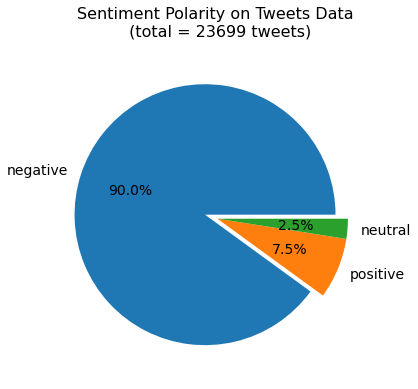

In [11]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in dfc['polarity'].value_counts()]
labels = list(dfc['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data \n (total = 23699 tweets)', fontsize = 16, pad = 20)
plt.show()

In [12]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = dfc[dfc['polarity'] == 'positive']
positive_tweets = positive_tweets[['clear', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,clear,polarity_score,polarity
1,chief henry salah satu yg disadari resesi menambah jumlah dana tunai cash nah dana tunai semakin banyak tinggal diversifikasi kemanfaatannya minimal manfaat manfaat dana darurat manfaat dana likuid manfaat perlundungan asuransi,34,positive
2,baru skripsian aja udh stress gini gimana ntar nyari kerja dapet kerja planning mau nikah pas nikah pas mau keluarga mikirin biaya anak biaya istri rumah keluarga mana resesi pas gua lulus cari kerja eh tp gua lulus semoga aja lulus ya allah,27,positive
3,mau tahun depan resesi engga memang tetep mulai merencanakan keuangan step by step yg simple dulu aja membiasakan mencatat keuangan bulanan cashflow positif punya dana darurat punya asuransi kesehatan baru investasi berbagai tujuan,25,positive
4,resesi global ini merupakan momentum pekerja membangun komunikasi baik manajemen perusahaan produksi tetap lancar lapangan kerja tetap tersedia,21,positive
5,sesungguhnya bersyukur menambah kenikmatan allah perbanyaklah doa hr aththabrani rt setuju ekonomi islam tahan resesi gmke,20,positive
6,mau bilang “ kalau buat ibadah yakin diganti ” sender bisanya berpikiran buat mengagalkan ibadah umroh emak bapaknya kayaknya bakal mental yak sender inget aja perhitungan allah beda ama perhitungan manusia buat persiapan resesi persiapan duniawi,20,positive
7,sedikit ekhawatiran resesi global khusnudzon optimis allah beserta takdirnya lebih besar ikhlas ridho takdir allah yakin allah akan memberikan kesulitan luar kemampuan yakin bersama kesulitan kemudahan,19,positive
8,taunya waktu studi pengaruh resesi nilai tukar petani marginal ditinjau aspek ketahanan pangan studi kasus jateng menemukan kajian mendalam soal struktur sosial peran gender wkwkwk,19,positive
9,diprediksikan ahli ekonomi terjadi resesi global orang bertauhid tetap bersyukur tetap keluar rumah mencari rezeki tetap berdoa amp berharap kepada allah,19,positive
10,resesi gue uda sulit segala aspek kehidupan kumohon jgn nyenggol gue taun depan ya allah ya pak jokowi ya mamak ya kerjaan ya duit normal aja,18,positive


In [13]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = dfc[dfc['polarity'] == 'negative']
negative_tweets = negative_tweets[['clear', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:10]

,clear,polarity_score,polarity
1,apa tarung betulan perang terdampak perang resesi terdampak resesi depresi ekonomi apa beda resesi amp depresi ekonomi resesi saat tetanggamu susah makan depresi saat kamu amp keluargamu sudah susah makan,-54,negative
2,gue bukan mau ngeremehin indo ngapain khawatir soal resesi dah bukannya tiap hari ngalamin resesi harusnya waspada tuh negara barat macam amerika jangan terlalu overreact isuisu resesi kek gituan bukan ancaman yang sebenarnya diem lo ekonom dadakan,-46,negative
3,mending dollar sih saran walau ekonomi cukup oke utk ini tp tentu kedepannya aman soalnya kepercayaan investor asing mulai menurun gara korupsi makin parah aja resesi gara investor cabut krn kehilangan kepercayaan bkn krn ekonomi menurun,-45,negative
4,harapan captain indonesia agus harimurti siapa calon pemimpin muda disaat dunia politik mengarah perang dunia resesi intimidasi ekonomi memiliki mental baja tahan intimidasi paham peta konspirasi dia bukan seorang prajurit kelas dunia,-42,negative
5,a thread keyword krisis amp resesi sedang hits dimanamana khususnya ranah online yang pro yang kontra yang percaya yang percaya ada yang apatis kedua istilah tersebut krisis amp resesi keniscayaan,-42,negative
6,paham perbedaan resesi akibat penurunan ekonomi biasa sama resesi akibat perang jadi fokusnya bukan resesi penyebabnya lagian lebih ngeri depresi ekonomi,-42,negative
7,yang kurang waras bicara atau kalian semua tanya yang paling tahu betul sri mulyani yang berkelit selalu masalah iklim perang dunia maka dunia resesi tanya dia ada gaji pegawai indonesia tahun kalian adu seperti ayam yg mematuk ekornya,-41,negative
8,penentuan resesi ibarat ahli forensik otopsi ambil bukti sampai sini harap mengerti kalau resesi bukan barometer penting konsumen pada umumnya dan adanya resesi bukan tahun bukan patokan bisa ongkang kaki tidak,-41,negative
9,isunya gencar resesi tahun depan perkirannya bakal naik suku bunga karena neken inflasi akibat pandemi butuh spend duit sebanyak mungkin nggak collaps yang pelajari kamu besok mikir makangak gausah terlalu mikir resesi,-41,negative
10,resesi jangan menahan uang biarkan tetep berputar cicil bitcoin jangan lain ingat only bitcoin beli emas jangan mas perhiasan cicil saham fundamental bagus setelah resesi profit mulai mengalir market mantul atas,-41,negative


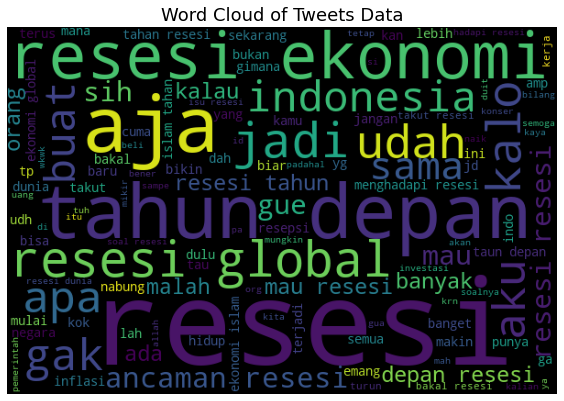

In [14]:
# Visualize word cloud

list_words=''
for tweet in dfc['token_tweets']:
    for word in tweet:
        list_words += ' '+(word)

wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [15]:
# nltk.FreqDist(sum(dfc['clear'].map(word_tokenize), []))
# list_words
tokens = nltk.tokenize.word_tokenize(list_words)
fdist=nltk.FreqDist(tokens)
fdist

FreqDist({'resesi': 10228, 'ekonomi': 1863, 'tahun': 1356, 'depan': 1175, 'aja': 1025, 'global': 978, 'indonesia': 875, 'mau': 871, 'dunia': 727, 'apa': 705, ...})

In [16]:
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]
        
        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
            
    return positive_words, negative_words

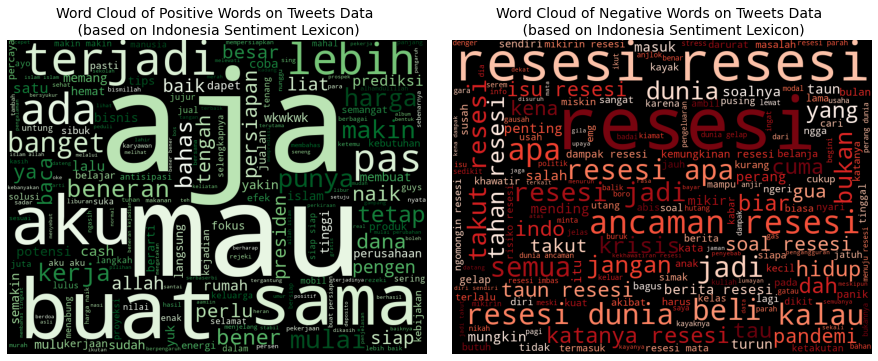

In [17]:
sentiment_words = dfc['token_tweets'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

In [18]:
dfc['Date'] = pd.to_datetime(dfc['Date']).dt.date

In [19]:
dfc

,Date,Tweets,clear,token_tweets,freq_words,stemmed_tweet,polarity_score,polarity,score
0,2022-10-16,@Pandu70100854 @emma_mbemz @abu_waras disaat badai covid menyerang seluruh penjuru dunia tak terkecuali negara2 majupun resesi.. Indonesia msh mencatat pertumbuhan ekonomi 5 koma... apa bukan suatu hal yg baik.? Allah msh sayang presiden Indonesia.. bisa ko Allah buat RI ambruk ekonomi nya.. kadrunista yg seneng,mbemz waras disaat badai covid menyerang seluruh penjuru dunia tak terkecuali negara majupun resesi indonesia msh mencatat pertumbuhan ekonomi koma apa bukan suatu baik allah msh sayang presiden indonesia ko allah buat ri ambruk ekonomi kadrunista yg seneng,"[mbemz, waras, disaat, badai, covid, menyerang, seluruh, penjuru, dunia, tak, terkecuali, negara, majupun, resesi, indonesia, msh, mencatat, pertumbuhan, ekonomi, koma, apa, bukan, suatu, baik, allah, msh, sayang, presiden, indonesia, ko, allah, buat, ri, ambruk, ekonomi, kadrunista, yg, seneng]","{'mbemz': 1, 'waras': 1, 'disaat': 1, 'badai': 1, 'covid': 1, 'menyerang': 1, 'seluruh': 1, 'penjuru': 1, 'dunia': 1, 'tak': 1, 'terkecuali': 1, 'negara': 1, 'majupun': 1, 'resesi': 1, 'indonesia': 2, 'msh': 2, 'mencatat': 1, 'pertumbuhan': 1, 'ekonomi': 2, 'koma': 1, 'apa': 1, 'bukan': 1, 'suatu': 1, 'baik': 1, 'allah': 2, 'sayang': 1, 'presiden': 1, 'ko': 1, 'buat': 1, 'ri': 1, 'ambruk': 1, 'kadrunista': 1, 'yg': 1, 'seneng': 1}","[mbemz, waras, saat, badai, covid, serang, seluruh, penjuru, dunia, tak, kecuali, negara, maju, resesi, indonesia, msh, catat, tumbuh, ekonomi, koma, apa, bukan, suatu, baik, allah, msh, sayang, presiden, indonesia, ko, allah, buat, ri, ambruk, ekonomi, kadrunista, yg, neng]",-8,negative,-1
1,2022-10-16,"“Puasa 1 hari pada saat jihad fisabilillah, Allah akan menjauhkan dirinya dari api neraka sejauh perjalanan 70 tahun.” (HR. Bukhari-Muslim) Ekonomi Islam Tahan Resesi .⏱️💡. #pcyXs",“ puasa hari saat jihad fisabilillah allah menjauhkan dirinya api neraka sejauh perjalanan tahun ” hr bukharimuslim ekonomi islam tahan resesi ️ pcyxs,"[“, puasa, hari, saat, jihad, fisabilillah, allah, menjauhkan, dirinya, api, neraka, sejauh, perjalanan, tahun, ”, hr, bukharimuslim, ekonomi, islam, tahan, resesi, ️, pcyxs]","{'“': 1, 'puasa': 1, 'hari': 1, 'saat': 1, 'jihad': 1, 'fisabilillah': 1, 'allah': 1, 'menjauhkan': 1, 'dirinya': 1, 'api': 1, 'neraka': 1, 'sejauh': 1, 'perjalanan': 1, 'tahun': 1, '”': 1, 'hr': 1, 'bukharimuslim': 1, 'ekonomi': 1, 'islam': 1, 'tahan': 1, 'resesi': 1, '️': 1, 'pcyxs': 1}","[, puasa, hari, saat, jihad, fisabilillah, allah, jauh, diri, api, neraka, jauh, jalan, tahun, , hr, bukharimuslim, ekonomi, islam, tahan, resesi, , pcyxs]",-3,negative,-1
2,2022-10-16,"“Bacalah Al-Qur’an, sesungguhnya Al-Qur’an itu akan datang pada hari kiamat untuk memberi syafa’at bagi orang yang membacanya.” (HR. Muslim) Ekonomi Islam Tahan Resesi",“ bacalah alqur ’ an sesungguhnya alqur ’ an akan datang hari kiamat memberi syafa ’ at orang membacanya ” hr muslim ekonomi islam tahan resesi,"[“, bacalah, alqur, ’, an, sesungguhnya, alqur, ’, an, akan, datang, hari, kiamat, memberi, syafa, ’, at, orang, membacanya, ”, hr, muslim, ekonomi, islam, tahan, resesi]","{'“': 1, 'bacalah': 1, 'alqur': 2, '’': 3, 'an': 2, 'sesungguhnya': 1, 'akan': 1, 'datang': 1, 'hari': 1, 'kiamat': 1, 'memberi': 1, 'syafa': 1, 'at': 1, 'orang': 1, 'membacanya': 1, '”': 1, 'hr': 1, 'muslim': 1, 'ekonomi': 1, 'islam': 1, 'tahan': 1, 'resesi': 1}","[, baca, alqur, , an, sungguh, alqur, , an, akan, datang, hari, kiamat, beri, syafa, , at, orang, baca, , hr, muslim, ekonomi, islam, tahan, resesi]",-2,negative,-1
3,2022-10-16,"Bila kita berniat baik dan juga melakukan yang baik, Maka Alloh menurunkan rasa nyaman di hati kita, Dan nyaman pula bagi di sekitar kita (Aa Gym) . . Ekonomi Islam Tahan Resesi .🏳️🏴🏳️. #YP2De https://t.co/gmphqB5TlQ",bila berniat baik juga melakukan baik alloh menurunkan rasa nyaman hati dan nyaman bagi sekitar aa gym ekonomi islam tahan resesi ️️ ypde,"[bila, b

In [20]:
by_day = pd.to_datetime(dfc['Date']).dt.to_period('D').value_counts().sort_index()
by_day.index = pd.PeriodIndex(by_day.index)
df_day = by_day.rename_axis('day').reset_index(name='counts')
df_day

,day,counts
0,2022-10-11,1596
1,2022-10-12,1443
2,2022-10-13,1293
3,2022-10-14,1859
4,2022-10-15,1195
5,2022-10-16,1876


In [21]:
pd.plotting.register_matplotlib_converters()

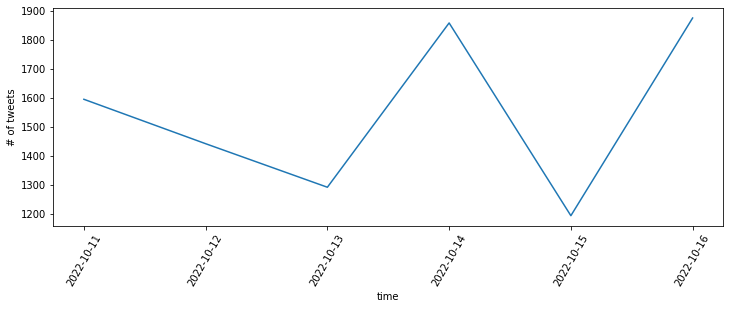

In [22]:
## plot results ##
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)
plt.plot(df_day.index,df_day.counts)
plt.xticks(df_day.index,df_day.day)
plt.xticks(rotation = 60)
# plt.legend()
plt.ylabel('# of tweets')
plt.xlabel("time")
plt.show()

In [23]:
import numpy as np

df_freq = pd.DataFrame(list(all_freq_words.items()), columns = ["Word","Frequency"]).sort_values(by='Frequency', ascending=False)
data_freq = df_freq.head()
data_freq

,Word,Frequency
13,resesi,10228
18,ekonomi,1863
46,tahun,1356
173,depan,1175
172,aja,1025


In [24]:
all_freq_words

FreqDist({'resesi': 10228, 'ekonomi': 1863, 'tahun': 1356, 'depan': 1175, 'aja': 1025, 'global': 978, 'indonesia': 875, 'mau': 871, 'dunia': 727, 'apa': 705, ...})

In [25]:
df_freq = pd.DataFrame(list(all_freq_words.items()), columns = ["Word","Frequency"]) 

<BarContainer object of 5 artists>

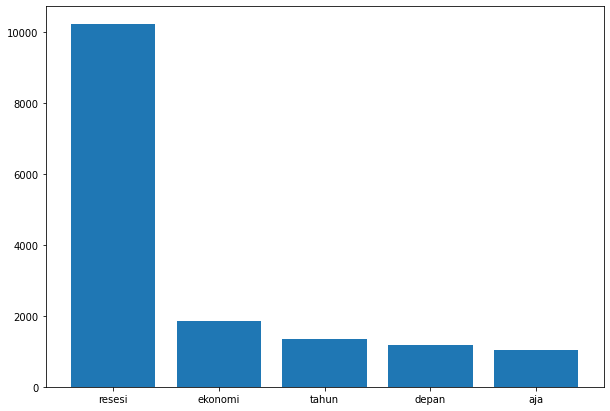

In [26]:
name = data_freq['Word']
price = data_freq['Frequency']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(name[0:10], price[0:10])
 
# Show Plot

NAIVE BAYES

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [28]:
X = dfc['clear']
Y = dfc['score']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 6)

In [29]:
#TF-IDF vectorization of text

tfidf_vectorizer = TfidfVectorizer() 
tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test_vectors = tfidf_vectorizer.transform(X_test)
print("n_samples: %d, n_features: %d" % tfidf_train_vectors.shape)

n_samples: 8335, n_features: 15935


In [30]:
#model training and prediction

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(tfidf_train_vectors, Y_train)

y_pred = naive_bayes_classifier.predict(tfidf_test_vectors)
print(classification_report(Y_test, y_pred)) #model evaluation

              precision    recall  f1-score   support

          -1       0.91      1.00      0.95       847
           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        60

    accuracy                           0.91       927
   macro avg       0.30      0.33      0.32       927
weighted avg       0.83      0.91      0.87       927



C:\Pytho\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Pytho\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Pytho\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print('Test accuracy = ', round(accuracy_score(Y_test, y_pred), 2))

Test accuracy =  0.91


In [32]:
cnf_mat = confusion_matrix(Y_test, y_pred)
cnf_mat #confusion_matrix

array([[847,   0,   0],
       [ 20,   0,   0],
       [ 60,   0,   0]], dtype=int64)

<AxesSubplot: >

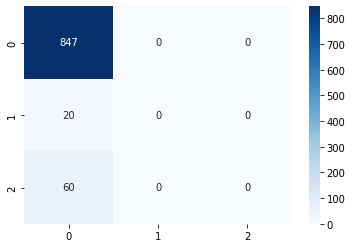

In [33]:
sns.heatmap(cnf_mat, annot = True, fmt = '', cmap = 'Blues')

In [34]:
TP = np.diag(cnf_mat)
TP = TP.astype(float)
FN = cnf_mat.sum(axis = 1) - TP
FN = FN.astype(float)
FP = cnf_mat.sum(axis = 0) - TP 
FP = FP.astype(float)
TN = cnf_mat.sum() - (TP + FN + FP)
TN = TN.astype(float)

# Sensitivity
TPR = TP/(TP+FN)

# Specificity
TNR = TN/(TN+FP) 

#Precision
FPR = FP/(TN+FP)

# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

# Classification error
Err = (FP+FN)/(TP+FP+FN+TN)

print('Recall = ', TPR.round(2))
print('Precision = ', FPR.round(2))
print('Accuracy = ', ACC.round(2))
print('Classification error = ', Err.round(2))

Recall =  [1. 0. 0.]
Precision =  [1. 0. 0.]
Accuracy =  [0.91 0.98 0.94]
Classification error =  [0.09 0.02 0.06]


LDA

In [35]:
dfc.head(3)

,Date,Tweets,clear,token_tweets,freq_words,stemmed_tweet,polarity_score,polarity,score
0,2022-10-16,@Pandu70100854 @emma_mbemz @abu_waras disaat badai covid menyerang seluruh penjuru dunia tak terkecuali negara2 majupun resesi.. Indonesia msh mencatat pertumbuhan ekonomi 5 koma... apa bukan suatu hal yg baik.? Allah msh sayang presiden Indonesia.. bisa ko Allah buat RI ambruk ekonomi nya.. kadrunista yg seneng,mbemz waras disaat badai covid menyerang seluruh penjuru dunia tak terkecuali negara majupun resesi indonesia msh mencatat pertumbuhan ekonomi koma apa bukan suatu baik allah msh sayang presiden indonesia ko allah buat ri ambruk ekonomi kadrunista yg seneng,"[mbemz, waras, disaat, badai, covid, menyerang, seluruh, penjuru, dunia, tak, terkecuali, negara, majupun, resesi, indonesia, msh, mencatat, pertumbuhan, ekonomi, koma, apa, bukan, suatu, baik, allah, msh, sayang, presiden, indonesia, ko, allah, buat, ri, ambruk, ekonomi, kadrunista, yg, seneng]","{'mbemz': 1, 'waras': 1, 'disaat': 1, 'badai': 1, 'covid': 1, 'menyerang': 1, 'seluruh': 1, 'penjuru': 1, 'dunia': 1, 'tak': 1, 'terkecuali': 1, 'negara': 1, 'majupun': 1, 'resesi': 1, 'indonesia': 2, 'msh': 2, 'mencatat': 1, 'pertumbuhan': 1, 'ekonomi': 2, 'koma': 1, 'apa': 1, 'bukan': 1, 'suatu': 1, 'baik': 1, 'allah': 2, 'sayang': 1, 'presiden': 1, 'ko': 1, 'buat': 1, 'ri': 1, 'ambruk': 1, 'kadrunista': 1, 'yg': 1, 'seneng': 1}","[mbemz, waras, saat, badai, covid, serang, seluruh, penjuru, dunia, tak, kecuali, negara, maju, resesi, indonesia, msh, catat, tumbuh, ekonomi, koma, apa, bukan, suatu, baik, allah, msh, sayang, presiden, indonesia, ko, allah, buat, ri, ambruk, ekonomi, kadrunista, yg, neng]",-8,negative,-1
1,2022-10-16,"“Puasa 1 hari pada saat jihad fisabilillah, Allah akan menjauhkan dirinya dari api neraka sejauh perjalanan 70 tahun.” (HR. Bukhari-Muslim) Ekonomi Islam Tahan Resesi .⏱️💡. #pcyXs",“ puasa hari saat jihad fisabilillah allah menjauhkan dirinya api neraka sejauh perjalanan tahun ” hr bukharimuslim ekonomi islam tahan resesi ️ pcyxs,"[“, puasa, hari, saat, jihad, fisabilillah, allah, menjauhkan, dirinya, api, neraka, sejauh, perjalanan, tahun, ”, hr, bukharimuslim, ekonomi, islam, tahan, resesi, ️, pcyxs]","{'“': 1, 'puasa': 1, 'hari': 1, 'saat': 1, 'jihad': 1, 'fisabilillah': 1, 'allah': 1, 'menjauhkan': 1, 'dirinya': 1, 'api': 1, 'neraka': 1, 'sejauh': 1, 'perjalanan': 1, 'tahun': 1, '”': 1, 'hr': 1, 'bukharimuslim': 1, 'ekonomi': 1, 'islam': 1, 'tahan': 1, 'resesi': 1, '️': 1, 'pcyxs': 1}","[, puasa, hari, saat, jihad, fisabilillah, allah, jauh, diri, api, neraka, jauh, jalan, tahun, , hr, bukharimuslim, ekonomi, islam, tahan, resesi, , pcyxs]",-3,negative,-1
2,2022-10-16,"“Bacalah Al-Qur’an, sesungguhnya Al-Qur’an itu akan datang pada hari kiamat untuk memberi syafa’at bagi orang yang membacanya.” (HR. Muslim) Ekonomi Islam Tahan Resesi",“ bacalah alqur ’ an sesungguhnya alqur ’ an akan datang hari kiamat memberi syafa ’ at orang membacanya ” hr muslim ekonomi islam tahan resesi,"[“, bacalah, alqur, ’, an, sesungguhnya, alqur, ’, an, akan, datang, hari, kiamat, memberi, syafa, ’, at, orang, membacanya, ”, hr, muslim, ekonomi, islam, tahan, resesi]","{'“': 1, 'bacalah': 1, 'alqur': 2, '’': 3, 'an': 2, 'sesungguhnya': 1, 'akan': 1, 'datang': 1, 'hari': 1, 'kiamat': 1, 'memberi': 1, 'syafa': 1, 'at': 1, 'orang': 1, 'membacanya': 1, '”': 1, 'hr': 1, 'muslim': 1, 'ekonomi': 1, 'islam': 1, 'tahan': 1, 'resesi': 1}","[, baca, alqur, , an, sungguh, alqur, , an, akan, datang, hari, kiamat, beri, syafa, , at, orang, baca, , hr, muslim, ekonomi, islam, tahan, resesi]",-2,negative,-1


In [36]:
documents = []
texts = []

for tweet in dfc['token_tweets']:
    texts.append(tweet)
    documents.append(tweet)
print(documents[0])

['mbemz', 'waras', 'disaat', 'badai', 'covid', 'menyerang', 'seluruh', 'penjuru', 'dunia', 'tak', 'terkecuali', 'negara', 'majupun', 'resesi', 'indonesia', 'msh', 'mencatat', 'pertumbuhan', 'ekonomi', 'koma', 'apa', 'bukan', 'suatu', 'baik', 'allah', 'msh', 'sayang', 'presiden', 'indonesia', 'ko', 'allah', 'buat', 'ri', 'ambruk', 'ekonomi', 'kadrunista', 'yg', 'seneng']


In [37]:
dictionary = corpora.Dictionary(documents)

document_term = [dictionary.doc2bow(document) for document in documents]

In [38]:
ldamodel = models.ldamodel.LdaModel(document_term, num_topics=10, id2word = dictionary)

In [39]:
ldamodel.print_topics(num_words=5)

[(0,
  '0.085*"resesi" + 0.021*"apa" + 0.011*"naik" + 0.011*"takut" + 0.011*"tahun"'),
 (1,
  '0.075*"resesi" + 0.017*"ekonomi" + 0.011*"global" + 0.010*"negara" + 0.009*"aja"'),
 (2,
  '0.096*"resesi" + 0.037*"tahun" + 0.034*"depan" + 0.014*"mau" + 0.011*"katanya"'),
 (3,
  '0.076*"resesi" + 0.021*"tahun" + 0.019*"depan" + 0.015*"mau" + 0.009*"risiko"'),
 (4,
  '0.085*"resesi" + 0.022*"ekonomi" + 0.018*"global" + 0.016*"indonesia" + 0.013*"hadapi"'),
 (5,
  '0.039*"resesi" + 0.013*"mau" + 0.011*"kepikiran" + 0.010*"kpop" + 0.008*"gila"'),
 (6,
  '0.047*"resesi" + 0.039*"ekonomi" + 0.034*"indonesia" + 0.019*"global" + 0.017*"imf"'),
 (7,
  '0.070*"resesi" + 0.018*"dunia" + 0.016*"sby" + 0.014*"global" + 0.014*"ekonomi"'),
 (8,
  '0.095*"resesi" + 0.012*"gue" + 0.010*"aja" + 0.010*"buat" + 0.009*"orang"'),
 (9,
  '0.073*"resesi" + 0.022*"ekonomi" + 0.009*"dunia" + 0.008*"as" + 0.008*"indonesia"')]

In [40]:
from joblib import dump

In [41]:
dump(ldamodel, './../MachineLearning/ldamodel.joblib')

['./../MachineLearning/ldamodel.joblib']

In [42]:
dump(cnf_mat, './../MachineLearning/confusion-matrix.joblib')

['./../MachineLearning/confusion-matrix.joblib']